# Word Cloud

We visualized the most occuring words in the collections by using Word Clouds. These word-clouds are also used as a comparison tool for female & male authors as well as the writings from different centuries.

In [3]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_row", None)
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import re
from num2words import num2words
import seaborn as sns

In [4]:
df = pd.read_csv("catalog\csv_iterations\Year_Loc_fixed.csv")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = stopwords.words('english')

full = " ".join([str(t) for t in df.Text])
# remove punctuation
full_no_punc = re.sub(r"\.|!", "",full)
full_no_punc = " ".join([i for i in full_no_punc.split() if len(i)>2])

# Tokenize
text_tokens = word_tokenize(full_no_punc)

# # Change to lower case and select only alphanumeric and tokens longer than two characters
pre_process = [i.lower() for i in text_tokens if i.isalnum() and len(i)>2]

# Remove Stop Words,# remove_single_characters
token_no_stopword = [word for word in pre_process if word not in stop_words and len(word)>2]

filtered_sentence = (" ").join(token_no_stopword)


In [5]:
df.head()

Collection_Head                     Name  \
0  A. B. Davis and Company  A. B. Davis and Company   
1              A.H. Roscoe              A.H. Roscoe   
2       Abbeville District       Abbeville District   
3        Abbott, William B        Abbott, William B   
4                      NaN        Abbott, William B   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               A. B. Davis and Company (Philadelphia, Pa. )  See  Davis (A. B.) and Company   
1  AeHe Roscoe (Firm: Nashville, Tenne )e  Journal, 1853, Septe-1857, Dece  1 item( 800 ppe )e  Wholesale and retail druggist and dealer in paints, oils, and dyestuffse  Summary: Journal (account book ) documents the sale of chemical and herbal drugs, paint and painting supplies, dyestuffs, personal and household supplies, and garden seeds to individuals and businessese  le Drugstores--Tennesseee 2e Paint shops--Equipment and supplies-—- Tennesseee 3e Dyes and dyeinge 46 Household supplies--Tennesseee 5c Herbs--Therapeutic usee 6+ Seed industry and trade--Tennessees 7e Nashville ite® nne )—--Commercee  20 MAY QO1 23804905 NDHYme   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Abbeville District (8.C.)  See South Carolina. Abbeville District   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Abbott, William B.  Papers, 1862-1864 Frederick Co., Va.  Section A  5-16-57  GUIDE  10 items   
4                                                                                                                                                                                                                                                   Abbott, William B. Papers, 1862-1864, Fre- Gerick Co., Va. 10 items. Sketch     These are the papers of William B. Abbott, evidently a well-to-do farmer of Frederick Co., Va. There are several documents concerned with the evaluation of 

In [6]:
# Look at the most common words
from collections import Counter
Counter = Counter(token_no_stopword)
print(Counter.most_common(50))

[('papers', 20290), ('letters', 16584), ('john', 12735), ('items', 10908), ('letter', 10792), ('william', 9892), ('collection', 9313), ('family', 7449), ('james', 6722), ('county', 6709), ('war', 6465), ('also', 6460), ('added', 6275), ('new', 5752), ('see', 5529), ('carolina', 5428), ('north', 5357), ('sketch', 5213), ('item', 4950), ('one', 4907), ('thomas', 4905), ('henry', 4673), ('book', 4609), ('george', 4527), ('ndhyme', 4378), ('may', 4267), ('two', 4101), ('virginia', 4042), ('general', 3921), ('first', 3836), ('correspondence', 3785), ('charles', 3673), ('army', 3599), ('south', 3402), ('state', 3225), ('records', 3211), ('business', 3196), ('written', 3095), ('robert', 3085), ('sir', 3039), ('washington', 3039), ('section', 2989), ('card', 2922), ('life', 2907), ('history', 2871), ('many', 2870), ('york', 2867), ('states', 2862), ('england', 2813), ('united', 2792)]


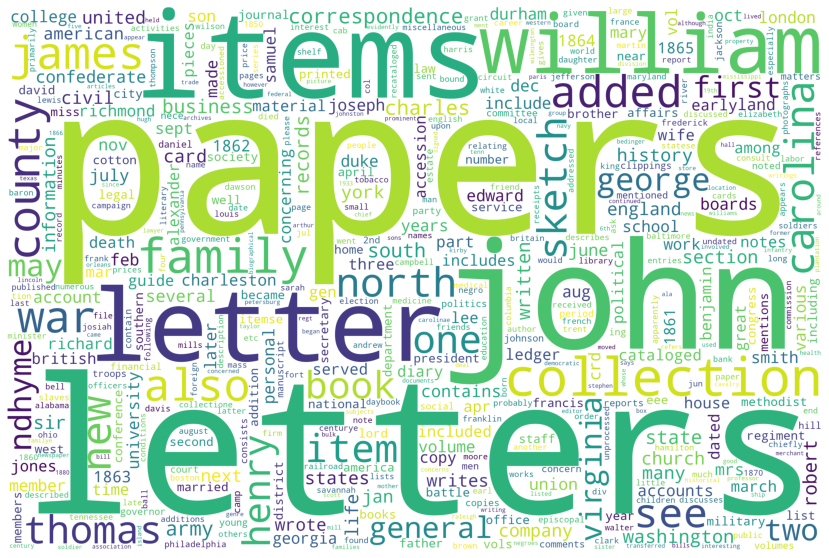

In [7]:
# Let's plot wordcloud based on frequency of word occurence
wordcloud = WordCloud(stopwords=stop_words,background_color="white", width=3000, height=2000, max_words=500,collocations=True).generate_from_frequencies(Counter)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

This wordcloud shows the major categories of the text like papers, books, accounts, collection and letters. But let's remove these common categorical words to better understand the most frequent topics.

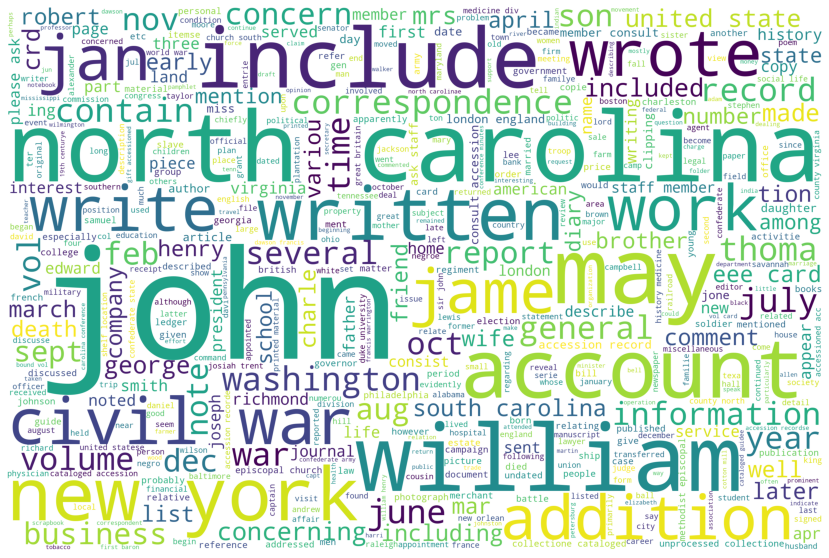

In [8]:
# Add common words that are not important to the list
stop_words.extend(["papers","letters",
"items","letter","collection","family","co","also","added","see","sketch","one","two","ten", "pp","book","section","ndhyme","many","item","next"])
wordcloud = WordCloud(stopwords=stop_words,background_color="white", width=3000, height=2000, max_words=500,collocations=True).generate(filtered_sentence)
# wordcloud.recolor(color_func = black_color_func)
plt.figure( figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

We have better plot, but let's add months to the stop word list and remove from the wordclouds

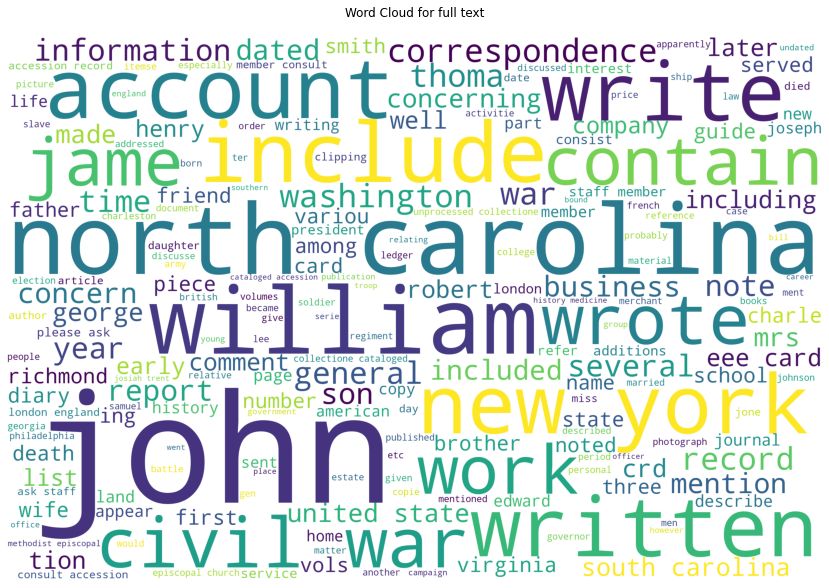

In [9]:
# Add words to stopwords
stop_words.extend(['dec', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov',
"december","january","febraury","march","april","may","june","july","august","september","october","november","vol","volume","addition","sept"])
wordcloud = WordCloud(stopwords=stop_words,background_color="white", width=3000, height=2000, max_words=200,collocations=True,prefer_horizontal=1).generate(filtered_sentence)
plt.figure( figsize=(20,10))
plt.title("Word Cloud for full text",pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

We still have some functional words which we can remove from the plots. Also, we will use a dictionary to change incorrect spellings (due to OCR) of some of the words appearing in the wordcloud.

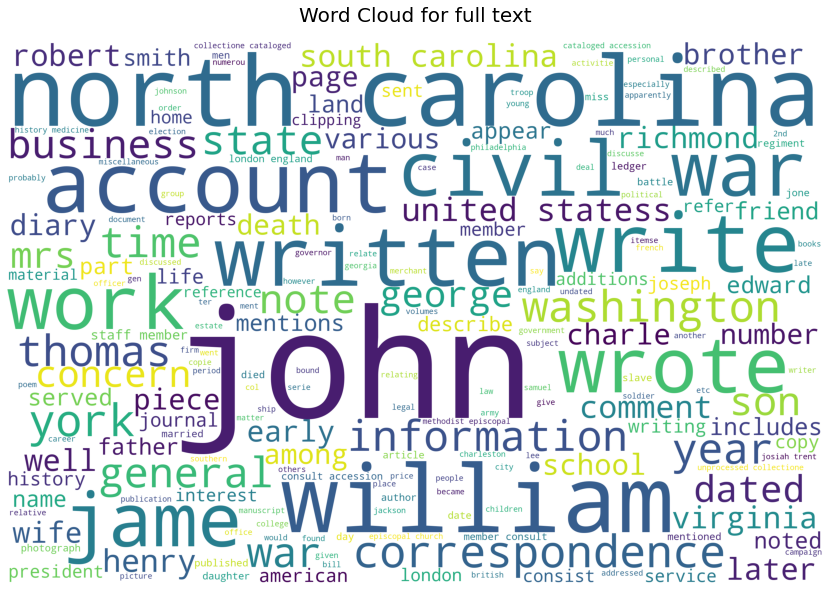

In [10]:
stop_words.extend(["include","included","crd","eee","card","new","contain","boards","cm","tion","including","company","vols","ing","three","first","papers","letters","paper","letter","collection","collections",
"items","record","records","contains","list","letter","collection","family","co","also","added","see","sketch","one","two","ten", "pp","book","section","ndhyme","many","item","next",
"december","january","febraury","march","april","may","report","mention","concerning","several","guide","made","june","july","august","september","october","november","vol","volume","addition","sept","please","ask"])
# Create spelling correction dictionary
change_dict = {"variou":"various","thoma":"thomas","thomass":"thomas","united state":"united states","variouss":"various"}
for i in change_dict:
    filtered_sentence =filtered_sentence.replace(i,change_dict[i])
wordcloud = WordCloud(stopwords=stop_words,background_color="white", width=3000, height=2000, max_words=200,collocations=True,prefer_horizontal=1).generate(filtered_sentence)
plt.figure( figsize=(20,10))
plt.title("Word Cloud for full text",pad=20,fontsize=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

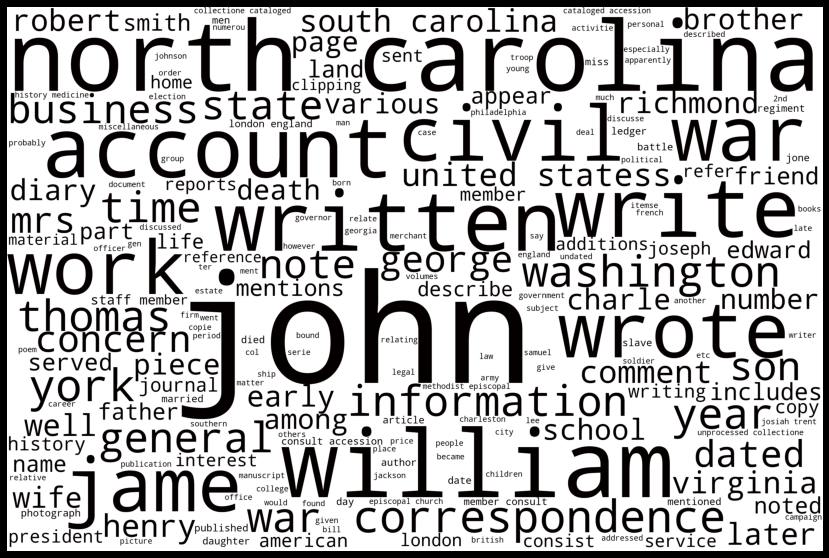

In [11]:
# Change the above plot to black and white

# function to change the plot to black & white
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")
    
wordcloud.recolor(color_func = black_color_func)
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

According to the plot, we have recurring themes such as the civil war, family relationships(father, brother, daughter, wife), business, history, work, company,army, photograph and war diary. Common places are North Carolina, South Carolina Virginia, Washington.

Due to problematic OCR scannings, the year, start and end columns need a manual cleaning. An attempt was made to clean manually, but there are still entries with incorrect information on those columns. For our analysis we will disregard those columns where the end date precedes the start date, and only select those entries with start year of 1700.

In [12]:
# Start date precedes end date
df_year = df[df.Start<df.End]

# Select records with start year of 1700
df_year = df_year[(df_year.Start>1700) & (df_year.End>1700) ]

In [13]:
print("Start dates used for our analysis")
print(sorted(df_year.Start.unique()))
print("----------")
print("End dates used for our analysis")
print(sorted(df_year.End.unique()))

Start dates used for our analysis
[1701.0, 1702.0, 1703.0, 1704.0, 1705.0, 1707.0, 1709.0, 1710.0, 1712.0, 1713.0, 1714.0, 1716.0, 1717.0, 1718.0, 1719.0, 1720.0, 1721.0, 1722.0, 1723.0, 1724.0, 1725.0, 1726.0, 1727.0, 1728.0, 1729.0, 1730.0, 1731.0, 1732.0, 1733.0, 1734.0, 1735.0, 1736.0, 1737.0, 1738.0, 1739.0, 1740.0, 1741.0, 1742.0, 1743.0, 1744.0, 1745.0, 1746.0, 1747.0, 1748.0, 1749.0, 1750.0, 1751.0, 1752.0, 1753.0, 1754.0, 1755.0, 1756.0, 1757.0, 1758.0, 1759.0, 1760.0, 1761.0, 1762.0, 1763.0, 1764.0, 1765.0, 1766.0, 1767.0, 1768.0, 1769.0, 1770.0, 1771.0, 1772.0, 1773.0, 1774.0, 1775.0, 1776.0, 1777.0, 1778.0, 1779.0, 1780.0, 1781.0, 1782.0, 1783.0, 1784.0, 1785.0, 1786.0, 1787.0, 1788.0, 1789.0, 1790.0, 1791.0, 1792.0, 1793.0, 1794.0, 1795.0, 1796.0, 1797.0, 1798.0, 1799.0, 1800.0, 1801.0, 1802.0, 1803.0, 1804.0, 1805.0, 1806.0, 1807.0, 1808.0, 1809.0, 1810.0, 1811.0, 1812.0, 1813.0, 1814.0, 1815.0, 1816.0, 1817.0, 1818.0, 1819.0, 1820.0, 1821.0, 1822.0, 1823.0, 1824.0, 1825.

Plot Records vs Time

<ipython-input-14-7b24686babbf>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  fg.set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]);


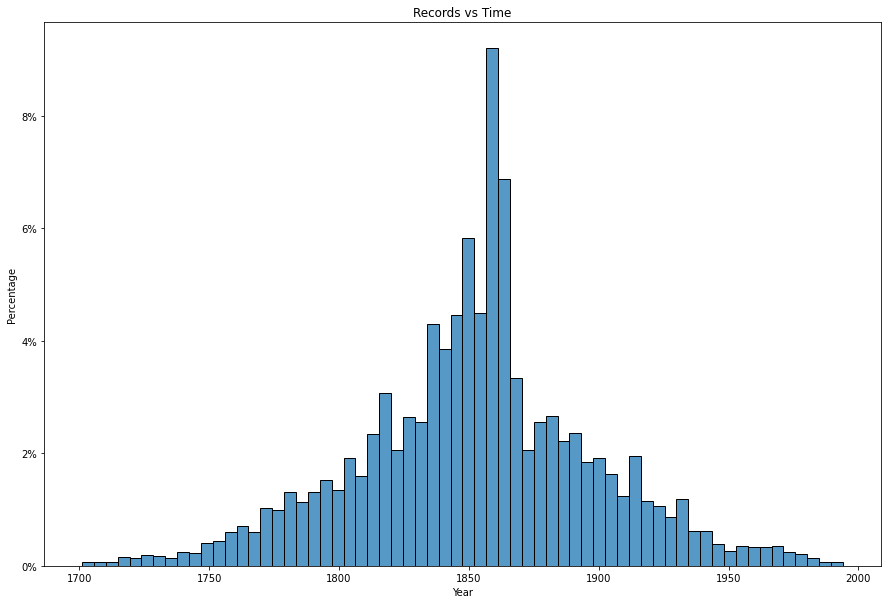

In [14]:
# Use Start Date
plt.figure(figsize=(15,10))
sns.histplot(df_year["Start"],stat="probability")
plt.title("Records vs Time")
plt.xlabel("Year")
plt.ylabel("Percentage")
fg = plt.gca()
fg.set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]);
plt.show()

<ipython-input-15-e3fdac0142d7>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  fg.set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]);


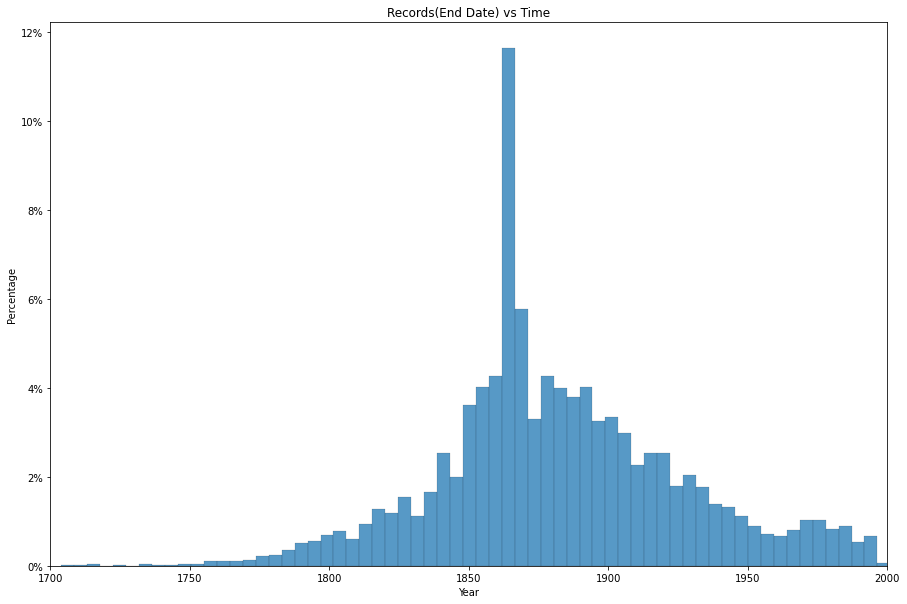

In [15]:
# Use End Date
plt.figure(figsize=(15,10))
sns.histplot(df_year["End"],stat="probability")
plt.title("Records vs Time (Using End Date)")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.xlim(1700,2000)
fg = plt.gca()
fg.set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]);
plt.show()

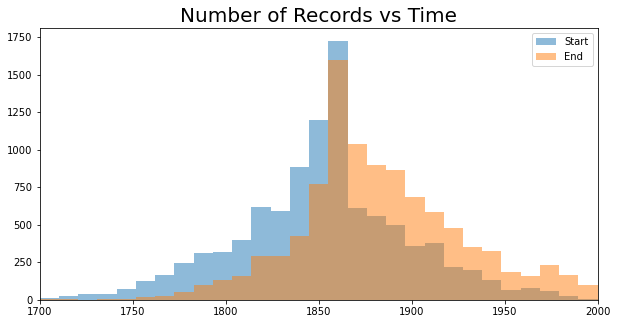

In [16]:
# Plot histogram for both Start and End dates
plt.figure(figsize=(10,5))
plt.xlim([1700,2000])
bins = np.linspace(1700, 2000, 30)

# plt.hist([df_year.Start], label=["Start Date","End Date"],stacked=True)
# plt.hist([df_year.End], label=["Start Date","End Date"],stacked=True)
plt.hist(df_year.Start,bins,stacked=True,alpha=0.5)
plt.hist(df_year.End,bins,stacked=True,alpha=0.5)



plt.title("Number of Records vs Time",fontsize=20)
plt.legend(["Start","End"]);

Add a cleaned text column for further comparison and word-clouds


In [17]:
def clean(full):
    # remove punctuation
    full_no_punc = re.sub(r"\.|!", "",full)
    
    # Select only those longer than 1
    full_no_punc = " ".join([i for i in full_no_punc.split() if len(i)>1])

    # Tokenize
    text_tokens = word_tokenize(full_no_punc)

    # Change to lower case and select only alphanumeric
    pre_process = [i.lower() for i in text_tokens if i.isalpha()]

    # Remove Stop Words,# remove_single_characters
    token_no_stopword = [word for word in pre_process if word not in stop_words]
# 
    filtered_sentence = (" ").join(token_no_stopword)
    return filtered_sentence

In [18]:
# New dataframe with cleaned column
df_set_year = df_year.groupby(["Start"])["Text"].apply(" ".join).reset_index()
df_set_year["Clean"] = df_set_year["Text"].apply(clean)
df_set_year.head()

Start  \
0  1701.0   
1  1702.0   
2  1703.0   
3  1704.0   
4  1705.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Text  \
0  Stampe, Thomas, de 17146  al 1701-1714.  Ve  Rector of Langley Burrell, Wiltshire, England; Nonjurore  Volume of writings and correspondence of Thomas Stampe,y who, in 1701, recanted an oath of allegiance to William and Mary, and thus became a Nonjuror while a beneficed clergy of the Church of Englande Writings and letters all relate to the issues of religion, government, and allegiances, and mention George Hickes and Thomas Ken, Bishop of Bath and Wellse The Bishop of Salisbury, Gilbert Burnet, was one of th e correspondents e  cate toned [@:- accession recorde  pJ 07 AUG 95 32935270 NDHYme SEE NEXT CRD Watts, Isaac *  Papers, 1701-1788  Stoke Newington, London, England EE XX/H- LT 2 items and 8 vols. 12.~1-66  *Part of the Frank Baker Collection of Wesleyana and British Methodism   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Grenoble (Généralité)  Records, 1702-1762 Grenoble, France  4-19-71 1 volume Recataloged, 2-6-75  Entered in National Union Catalog of Manu-  scripts as French Misc. Papers   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Macky, John Papers, ca. 1703-1704 London, England . 18-.G 1 volume 10-13-58  Recataloged, 9-9-69 Southwell, Edward, I Papers, 1703-1724 London, England  SAH = E- 4 items l item added,  8-4-1959 10-26-60 6 10:8   
3                                                                                                                                                                                                                                                                                                                                                                    e 6th 22:B (60-93, 60-97)$ 2nd 25:C Fraser, Fredericke Papers, 1704-1899. 1684 itemse Cotton planter of Beaufort (Beaufort Coe de SeCe A few business letters, but contains mostly bills and receipts from various wholesale companiese Unprocessed collectione Cataloged from accession recordse Addition to Frederick Fraser Papers, 1740-1924. *hab 1e Beaufort (SeCe )—-—-Commer

# Common words by Years

1700-1800

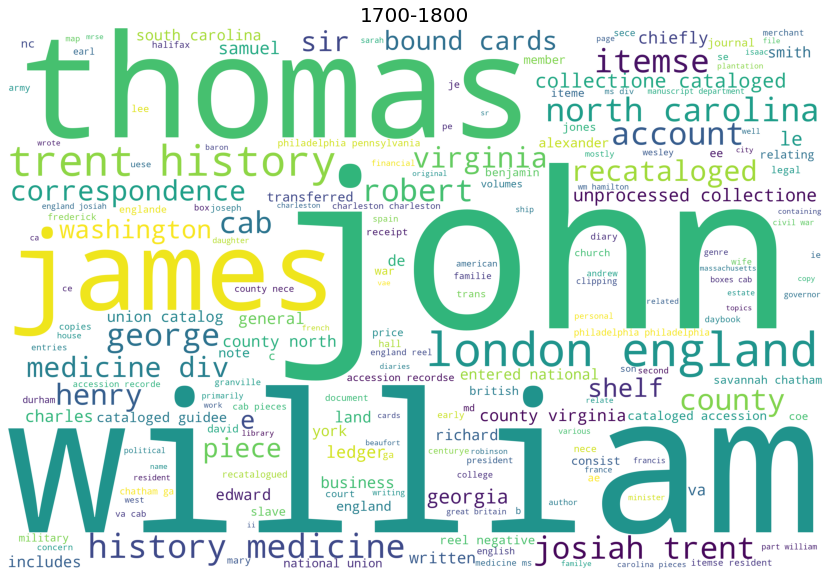

In [19]:
# Let's plot wordcloud based on frequency of word occurence
condition =(df_set_year.Start>=1700) & (df_set_year.Start<=1800)
filtered_string = " ".join(df_set_year[condition].Clean.tolist())


# Create spelling correction dictionary
change_dict = {"variou":"various","thoma":"thomas","thomass":"thomas","united state":"united states","variouss":"various"}
for i in change_dict:
    filtered_string =filtered_string.replace(i,change_dict[i])
wordcloud = WordCloud(stopwords=stop_words,background_color="white", width=3000, height=2000, max_words=200,collocations=True,prefer_horizontal=1).generate(filtered_string)

# change it to black&white optional
# wordcloud.recolor(color_func = black_color_func)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.title("1700-1800",fontsize=20)
plt.axis("off")
plt.show()

1800-1900

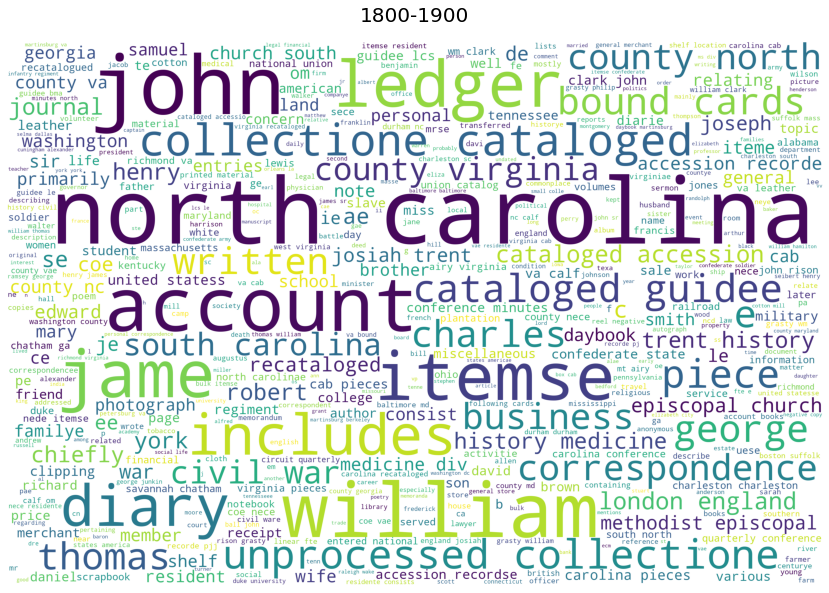

In [20]:
# Let's plot wordcloud based on frequency of word occurence
condition =(df_set_year.Start>=1800) & (df_set_year.Start<=1900)
filtered_string = " ".join(df_set_year[condition].Clean.tolist())

for i in change_dict:
    filtered_string =filtered_string.replace(i,change_dict[i])

wordcloud = WordCloud(stopwords=stop_words,background_color="white", width=3000, height=2000, max_words=500,collocations=True,prefer_horizontal=1).generate(filtered_string)

# change it to black&white optional
# wordcloud.recolor(color_func = black_color_func)
plt.figure(figsize=(20,10))
plt.title("1800-1900",fontsize=20,pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

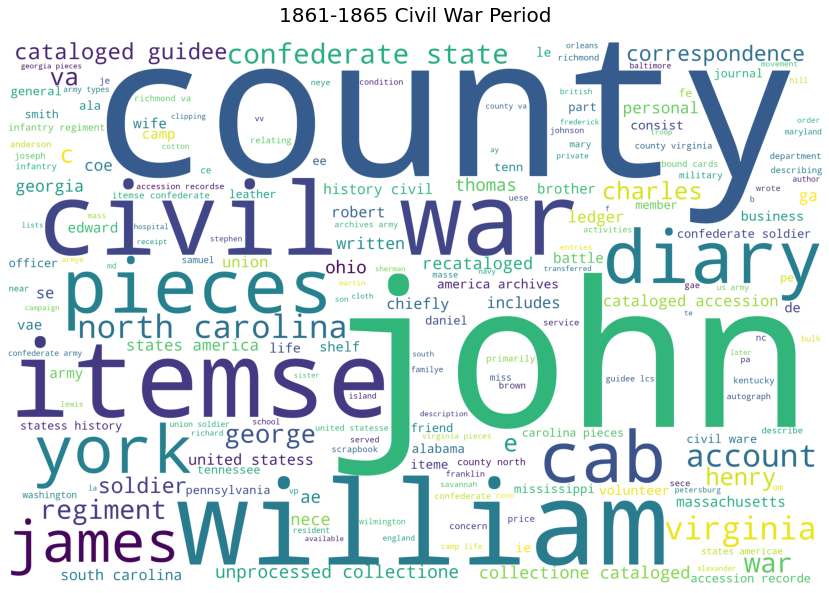

In [28]:
# Let's plot wordcloud based on frequency of word occurence
condition =(df_set_year.Start>=1861) & (df_set_year.Start<=1865)
filtered_string = " ".join(df_set_year[condition].Clean.tolist())

for i in change_dict:
    filtered_string =filtered_string.replace(i,change_dict[i])

wordcloud = WordCloud(stopwords=stop_words,background_color="white", width=3000, height=2000, max_words=200,collocations=True,prefer_horizontal=1).generate(filtered_string)

# change it to black&white optional
# wordcloud.recolor(color_func = black_color_func)
plt.figure(figsize=(20,10))
plt.title("1861-1865 Civil War Period",fontsize=20,pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()